## Creating a Many-to-Many Neural Network from Scratch

In this IPython notebook, we'll build a neural network using NumPy and Python's random library, focusing on a many-to-many (N to N) architecture which means we can define N layer with N nodes for each layer. This means our network will handle scenarios where each input corresponds to multiple outputs. We'll cover how to define layers, activation functions, and initialize weights randomly. Then, we'll walk through how the network predicts outputs, computes loss using techniques like Mean Squared Error (MSE), and adjusts weights through backpropagation for improved accuracy. This practical example will help you grasp the essentials of neural networks and empower you to create and customize your own models effectively.

In [1]:
# We Will import required libraries
import numpy, pandas, numpy as np
from keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
from time import time

### Importing Dataset
The MNIST dataset is a collection of 70,000 handwritten digits (0-9), widely used for training and testing machine learning models in image recognition tasks.

First we will use this function to get the input and ouput from mnist data. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database consists of 60,000 training images and 10,000 testing images. Because there are 10 digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9, there will be 10 classes in layer.

In [2]:
data = np.load(file = "mnist.npz")

train_x = data['x_train']/255    # normalizing the data
train_y = data['y_train']

test_x = data['x_test']/255      # normalizing the data
test_y = data['y_test']

final_train_x = numpy.reshape(train_x,(len(train_x),-1))
final_test_x = numpy.reshape(test_x,(len(test_x),-1))
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

### Visualizing Dataset using matplotlib
In this section, we will utilize Matplotlib, a powerful plotting library in Python, to gain insights into our dataset. We'll explore the structure and characteristics of the data through various types of visualizations.

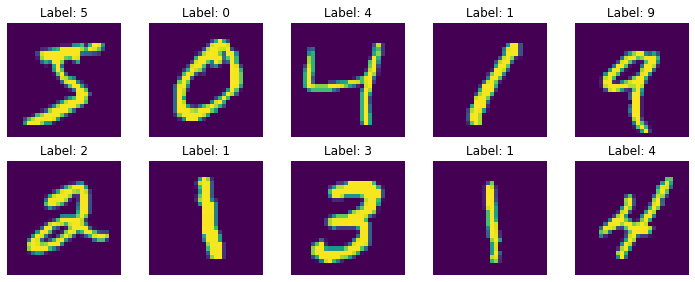

In [9]:
plt.figure(figsize=(10, 4))

# Iterate over the first 10 samples in the dataset
for i in range(10):
    # Create subplots in a 2x5 grid (2 rows, 5 columns), position i+1
    plt.subplot(2, 5, i + 1)
    # Display the image corresponding to train_x[i]
    plt.imshow(train_x[i])
    # Set the title of each subplot to show the label (train_y[i])
    plt.title(f'Label: {train_y[i]}')
    # Turn off axis labels and ticks for cleaner presentation
    plt.axis('off')

# Adjust layout to avoid overlapping subplots
plt.tight_layout()
# Display the plot
plt.show()

### Structure of the Neural Network
In Python, we will construct our neural network using object-oriented programming principles. By defining a class, we can encapsulate the network’s architecture, parameters, and methods for training and prediction.

### We require three things

#### Intializing a default Network
model is an instance of the NeuralNetwork class. This line initializes a neural network object with default parameters, which might include input size, hidden layers, output size, and initial weights and biases.
#### Adding Layers
Assuming the NeuralNetwork class has an add method, these lines add layers to the neural network. Each add call specifies the number of nodes (nodeTot) in the layer and the activation function (activation). In this case, sigmoid activation functions are used for both layers.
#### Training the Model
The fit method is responsible for training the neural network. It takes training data (final_train_x) and corresponding labels (y_train) as inputs, along with the number of training epochs (epochs).


In [1]:
# Example
# model = NeuralNetwork()
# model.add(nodeTot = 20,activation="sigmoid")
# model.add(nodeTot = 10,activation="sigmoid") 
# model.fit(final_train_x, y_train, epochs=1)

#### Imports and Initialization:

The class imports necessary libraries (numpy, math, sys, copy, requests) for numerical operations, random number generation, system-level functions, and copying objects.
np.random.seed(42) ensures reproducibility by initializing the random number generator with a seed value.

    class NeuralNetwork:
        import numpy as np
        import math
        from numpy.random import RandomState
        import sys, copy, requests
        np.random.seed(42)

        def __init__(self):
            self.weights = {}
            self.bias = {}
            self.layer = {}
            self.activations = []
            self.nodeList = []



#### .add Method:
Adds a layer to the neural network with a specified number of nodes (nodeTot) and activation function (activation).
Appends activation to activations list and nodeTot to nodeList.

    def add(self, nodeTot, activation=''):
            self.activations.append(activation)
            self.nodeList.append(nodeTot)


#### Forward Propagation (ForwardPropagation Method):
Iterates through each layer (LI) from input to output (self.lenOfNode - 1).
Calculates layer activations using weights (self.weights) and biases (self.bias) for each layer.


        def ForwardPropagation(self):
            for LI in range(0, self.lenOfNode - 1):  # Layer Index
                self.layer[f'{LI + 1}'] = self.activationOnLayer(
                    self.np.dot(self.layer[f'{LI}'], self.weights[f'{LI}']) + self.bias[f'{LI}'], LI)

#### Loss Calculation (CalculatingLoss Method):
Computes mean squared error loss between predicted output (self.layer[f'{self.lenOfNode - 1}']) and actual output (outputs).

        def CalculatingLoss(self, outputs):
            return (1 / len(self.layer[f'{self.lenOfNode - 2}'])) * (
                        self.layer[f'{self.lenOfNode - 1}'] - outputs) ** 2

#### Backpropagation (BackProp Method):
Performs backpropagation to update weights (self.weights) and biases (self.bias) based on the calculated loss derivatives (lossDerivative).


In [13]:
# Neural Network from Scratch

class NeuralNetwork:
    import numpy as np,math
    from numpy.random import RandomState
    import sys,copy
    import requests
    np.random.seed(42)
    
    def __init__(self):
        self.weights = {}
        self.bias = {}
        self.layer = {}
        self.activations = []
        self.nodeList = []
    
        
    def add(self, nodeTot, activation=''):
        self.activations.append(activation)
        self.nodeList.append(nodeTot)
        
        
    def checkXData(self,inputs):
        try:
            if len(inputs[0].shape)==1:
                return 0
            else:
                print("Please provide correct X data, Data must be in Numpy 2 Dimensional")
                return -1
        except:
            print("Please provide correct X data, Data must be in Numpy 2 Dimensional")
            return -1
        
    def checkYData(self,outputs):
        try:
            
            if len(outputs.shape)==2:
                if(len(outputs[0])==self.nodeList[-1]):
                    return 0
                else:
                    print(f"Output class is not Equal,{self.nodeList[-1]} is provided, {len(outputs[0])} is required ")
                    return -1
            else:
                print("Please give One Hot enconded Data, Data must be in Numpy 2 Dimensional")
                return -1
        except:
            print("Please provide correct Y data, Data must be in Numpy 2 Dimensional")
            return -1
    def fit(self,inputs, outputs, epochs, learning_rate=0.1):
        """
        Trains the neural network using inputs (inputs) and corresponding outputs (outputs) 
         over a specified number of epochs (epochs) with a learning rate (learning_rate).
        """
        # Checking If Data is correct.
        checkXD = self.checkXData(inputs)
        checkYD = self.checkYData(outputs)
        if(checkXD==-1):
            return
        if(checkYD==-1):
            return
        
    
        # Adding no of Node in first layer
        self.nodeList.insert(0,len(inputs[0]))
        
        # Adding Sigmoid Activations, as the loss function is categorical sparce entropy
        self.activations.append('sigmoid')
        self.layer['0'] = inputs[0]
        
        # Initializing total no of NodeList(which is a list containing no of neuron in layers.)
        self.lenOfNode = len(self.nodeList)
        
        # Initializing Weights and Biases.
        for i in range(0,self.lenOfNode-1):
            self.weights[f'{i}'] = self.np.random.uniform(-0.4,0.4,(self.nodeList[i],self.nodeList[i+1]))
            self.bias[f'{i}'] =  self.np.zeros(self.nodeList[i+1])

        # Total instance or total data
        totInstance = len(outputs)
        # Used to Print Loss
        perPrintGap = totInstance*0.20
        
        # Start Training
        for epoch in range(epochs):
            print(f"\nEpoch: {epoch}")
            for instance in range(totInstance):
            
                # Intializing Input Data
                self.layer['0'] = inputs[instance]
                outputLayer = outputs[instance]
                
                # forward Propagation (model predicts and store in last layer)
                self.ForwardPropagation()
                
                # Calculating Loss (compare to real data, it calculates loss between real and predicted data)
                lossLayer = self.CalculatingLoss(outputLayer)
                
                # Now based on the Loss, The model adjust itself and tries to fit(learn) the data.
                
                # BackPropagation (Algorithm that makes the model learn.)
                self.BackProp(outputLayer,learning_rate)             
                
                # Print the loss
                if(instance%(perPrintGap)==0):
                    losse = self.PrintLoss(instance,totInstance,lossLayer)
            # Print the loss        
            losse = self.PrintLoss(instance,totInstance,lossLayer)        
            
            
    # We only have Sigmoid as activation function.         
    def activationOnLayer(self,input,layerIndex):
        if(self.activations[layerIndex]=='sigmoid'):    
            return 1/(1+self.math.e**(-input))
        else:
            return input
        
    
    def ForwardPropagation(self):
        for LI in range(0,self.lenOfNode-1): # Layer Index
            self.layer[f'{LI+1}']= self.activationOnLayer(self.np.dot(self.layer[f'{LI}'],self.weights[f'{LI}']) + self.bias[f'{LI}'],LI)
            
    def CalculatingLoss(self,outputs):
        return (1/len(self.layer[f'{self.lenOfNode-2}']))*(self.layer[f'{self.lenOfNode-1}']-outputs)**2
    
    def BackProp(self,outputLayer,lr):
        # A copy to stored derivatives
        weights = self.copy.deepcopy(self.weights)
        bias = self.copy.deepcopy(self.bias)
        
        # Calculating derivatives of last layer
        lassLayerIndex = len(self.activations)-1
        lossDerivative = (self.layer[f'{lassLayerIndex}'] - outputLayer)

        # Derivatives of last layer
        weights[f'{lassLayerIndex-1}'] = lossDerivative
          
        for LI in reversed(range(1,self.lenOfNode-1)):    
            weights[f'{LI-1}'] = (self.layer[f'{LI}']-self.layer[f'{LI}']**2)*self.np.sum(weights[f'{LI}'] * self.weights[f'{LI}'],axis=1)

        for key in reversed(self.weights.keys()):            
            self.weights[key] += - lr* self.np.reshape(self.layer[key],(len(self.layer[key]),-1)) *weights[key]
            self.bias[key] += - lr* weights[key]
            
                    
    def PrintLoss(self,currentInstance,totInstance,lossLayer):
        done = int(100*currentInstance/totInstance)+1
        loss = sum(lossLayer)
        self.sys.stdout.write('\r[{}{}] - Loss: {}'.format('=' * int(done/2)+'>', '.' * (50-int(done/2)),str(loss)))
        self.sys.stdout.flush()
        return loss
    
    def predict(self,input):
        try:
            self.layer['0'] = input
            self.ForwardPropagation()
            return self.np.argmax(self.layer[f'{len(self.layer)-1}'])
        except:
            print("There is some error in input, e.g only one input required.")


We can add N layers with N nodes, Remember In last layer, We have to add Nodes exact number to Total class, Here in Our dataset we have 10 class (0-9), so 10 nodes in the last layer. ⬇️

In [14]:
model = NeuralNetwork()
model.add(nodeTot = 20,activation="sigmoid")
model.add(nodeTot = 10,activation="sigmoid") 
model.fit(final_train_x, y_train, epochs=1)

(60000, 10)

Epoch: 0
[==================================================>] - Loss: 0.0003390216222704933

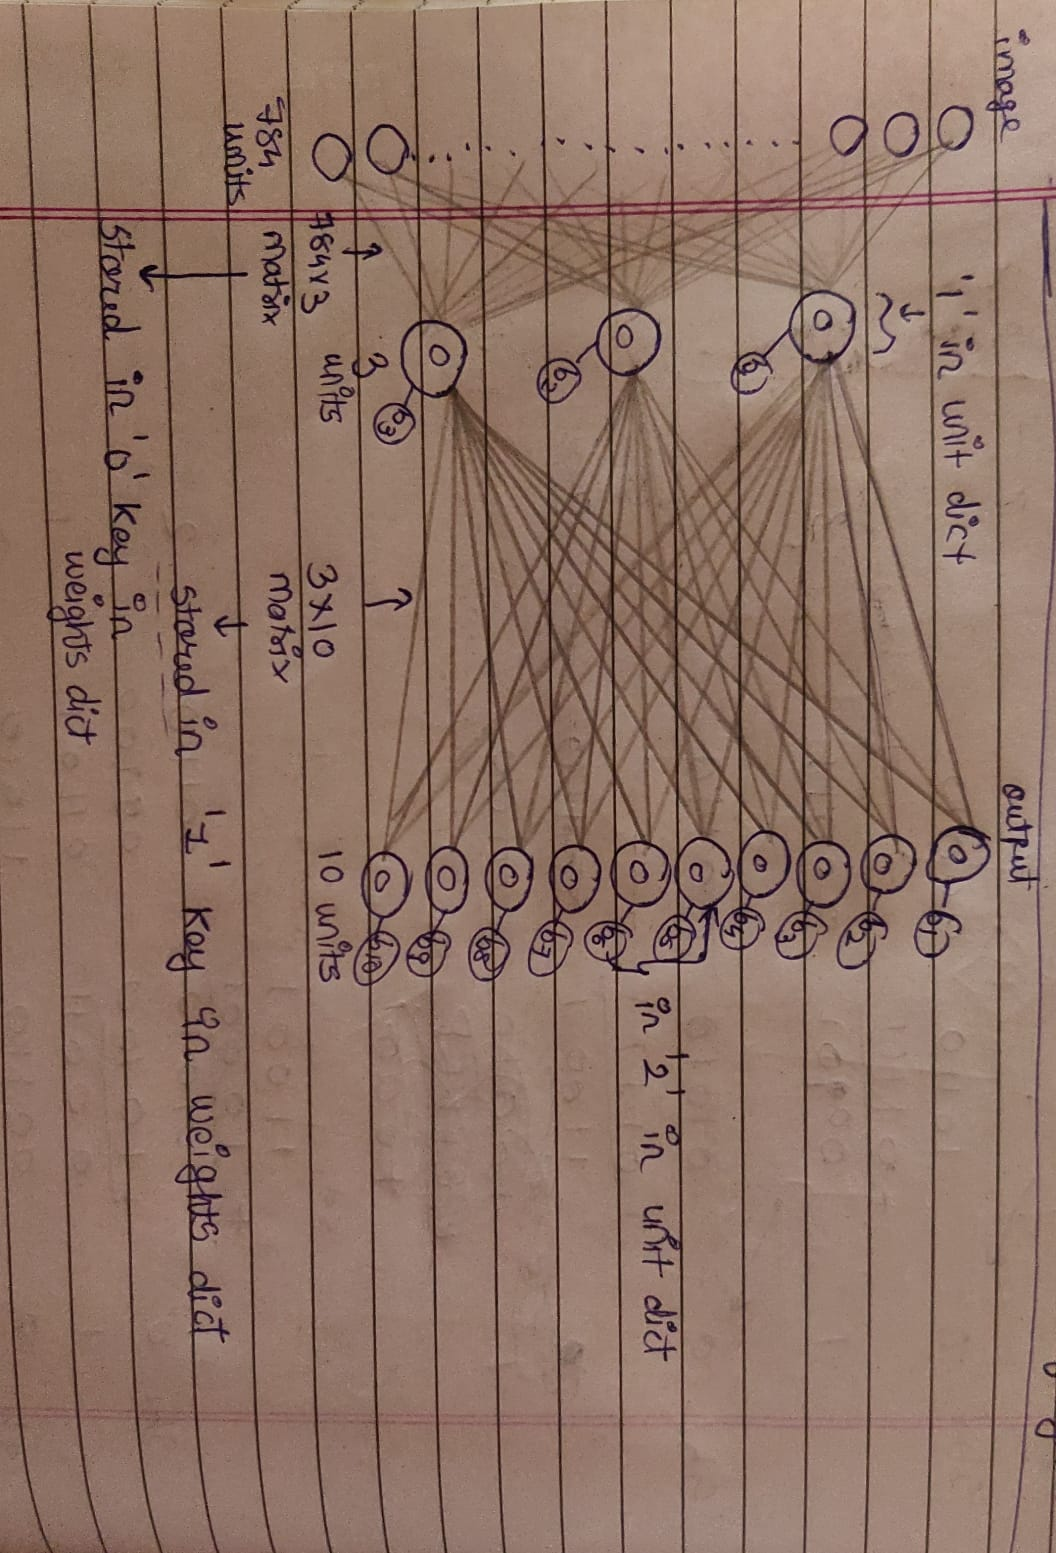

### Finally, Time for Prediction
Now comes the exciting part—using our trained neural network to make predictions! Let's leverage the model.predict function to see our network in action.

Predictions is :  7


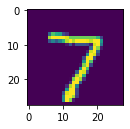

In [17]:
# Displaying one example from test dataset
plt.figure(figsize=(10, 4))
plt.subplot(2, 5, 2)
plt.imshow(test_x[0])


predictions = model.predict(final_test_x[0])   # test_x () and final_test_x is same but in different Dimension.
print("Predictions is : ", predictions)

In [16]:
final_test_x.shape, test_x.shape

((10000, 784), (10000, 28, 28))